<a href="https://colab.research.google.com/github/MetisArom/MDST-Movie_Quotes/blob/main/MDST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MDST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [ ]:
df_titles = pd.read_table('movie_titles_metadata.tsv')

In [ ]:
df_titles.head(100)

,movie_id,movie_title,year,rating,num_ratings,genres
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']
...,...,...,...,...,...,...
95,m95,i am legend,2007,7.1,156084.0,['drama' 'sci-fi' 'thriller']
96,m96,invaders from mars,1953,6.4,2115.0,['horror' 'sci-fi']
97,m97,independence day,1996,6.6,151698.0,['action' 'adventure' 'sci-fi' 'thriller']
98,m98,indiana jones and the last crusade,1989,8.3,174947.0,['action' 'adventure' 'thriller' 'action' 'adv...


In [ ]:
df_titles = df_titles.dropna()
df_titles.shape

(616, 6)

In [ ]:
df_titles = df_titles.drop(["movie_title", "year","num_ratings"], axis='columns')
df_titles.head()

,movie_id,rating,genres
0,m0,6.9,['comedy' 'romance']
1,m1,6.2,['adventure' 'biography' 'drama' 'history']
2,m2,6.1,['action' 'crime' 'drama' 'thriller']
3,m3,8.4,['adventure' 'mystery' 'sci-fi']
4,m4,6.9,['action' 'comedy' 'crime' 'drama' 'thriller']


In [ ]:
df_lines = pd.read_table('movie_lines.tsv',on_bad_lines='skip')

In [ ]:
df_lines = df_lines.dropna()
df_lines.shape

(288620, 5)

In [ ]:
df_lines.head()

,line_id,character_id,movie_id,character_name,text
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [ ]:
df_lines = df_lines.drop("character_name", axis='columns')
df_lines.head()

,line_id,character_id,movie_id,text
0,L1045,u0,m0,They do not!
1,L1044,u2,m0,They do to!
2,L985,u0,m0,I hope so.
3,L984,u2,m0,She okay?
4,L925,u0,m0,Let's go.


In [ ]:
df_characters = pd.read_table('movie_characters_metadata.tsv', on_bad_lines='skip')
df_characters

,character_id,character_name,movie_id,movie_title,gender,pos_credits
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6
...,...,...,...,...,...,...
9029,u9030,DURNFORD,m616,zulu dawn,?,?
9030,u9031,MELVILL,m616,zulu dawn,?,?
9031,u9032,NORRIS-NEWMAN,m616,zulu dawn,?,?
9032,u9033,STUART SMITH,m616,zulu dawn,?,?


In [ ]:
df_characters = df_characters.drop(["character_name","movie_title", "pos_credits"], axis='columns')
df_characters

,character_id,movie_id,gender
0,u0,m0,f
1,u1,m0,?
2,u2,m0,m
3,u3,m0,?
4,u4,m0,m
...,...,...,...
9029,u9030,m616,?
9030,u9031,m616,?
9031,u9032,m616,?
9032,u9033,m616,?


In [ ]:
df_conversations = pd.read_table('movie_conversations.tsv', on_bad_lines='skip')
df_conversations.head()

,character_1_id,character_2_id,movie_id,line_ids
0,u0,u2,m0,['L194' 'L195' 'L196' 'L197']
1,u0,u2,m0,['L198' 'L199']
2,u0,u2,m0,['L200' 'L201' 'L202' 'L203']
3,u0,u2,m0,['L204' 'L205' 'L206']
4,u0,u2,m0,['L207' 'L208']


In [ ]:
df_data = df_lines
#df_data = df_data.set_index('movie_id','character_id').join(df_characters.set_index('movie_id','character_id'), lsuffix='1', rsuffix='2', on=['movie_id','character_id'], how='inner')
df_data = pd.merge(df_data, df_characters, on=['movie_id','character_id'], how='inner')

In [ ]:
#df_data = df_data.set_index('movie_id').join(df_conversations, lsuffix='1', rsuffix='3')
#df_data = df_data.set_index('movie_id').join(df_titles, lsuffix='1', rsuffix='4')
#pd.merge(df_data, df_conversations, on=['movie_id','character_id'], how='inner')
df_data = pd.merge(df_data, df_titles, on=['movie_id'], how='inner')

In [ ]:
print(df_data.dtypes)
print(df_lines.dtypes)
print(df_characters.dtypes)
print(df_conversations.dtypes)
print(df_titles.dtypes)

line_id          object
character_id     object
movie_id         object
text             object
gender           object
rating          float64
genres           object
dtype: object
line_id         object
character_id    object
movie_id        object
text            object
dtype: object
character_id    object
movie_id        object
gender          object
dtype: object
character_1_id    object
character_2_id    object
movie_id          object
line_ids          object
dtype: object
movie_id     object
rating      float64
genres       object
dtype: object


In [ ]:
df_data

,line_id,character_id,movie_id,text,gender,rating,genres
0,L1045,u0,m0,They do not!,f,6.9,['comedy' 'romance']
1,L985,u0,m0,I hope so.,f,6.9,['comedy' 'romance']
2,L925,u0,m0,Let's go.,f,6.9,['comedy' 'romance']
3,L872,u0,m0,Okay -- you're gonna need to learn how to lie.,f,6.9,['comedy' 'romance']
4,L869,u0,m0,Like my fear of wearing pastels?,f,6.9,['comedy' 'romance']
...,...,...,...,...,...,...,...
288145,L666522,u9034,m616,So far only their scouts. But we have had repo...,?,6.4,['action' 'adventure' 'drama' 'history' 'war']
288146,L666520,u9034,m616,Well I assure you Sir I have no desire to crea...,?,6.4,['action' 'adventure' 'drama' 'history' 'war']
288147,L666372,u9034,m616,I think Chelmsford wants a good man on the bor...,?,6.4,['action' 'adventure' 'drama' 'history' 'war']
288148,L666370,u9034,m616,I'm to take the Sikali with the main column to...,?,6.4,['action' 'adventure' 'drama' 'history' 'war']


In [ ]:
df_data.head()
df_data.shape

(288150, 7)

In [ ]:
df_data.head(100)

,line_id,character_id,movie_id,text,gender,rating,genres
0,L1045,u0,m0,They do not!,f,6.9,['comedy' 'romance']
1,L985,u0,m0,I hope so.,f,6.9,['comedy' 'romance']
2,L925,u0,m0,Let's go.,f,6.9,['comedy' 'romance']
3,L872,u0,m0,Okay -- you're gonna need to learn how to lie.,f,6.9,['comedy' 'romance']
4,L869,u0,m0,Like my fear of wearing pastels?,f,6.9,['comedy' 'romance']
...,...,...,...,...,...,...,...
95,L984,u2,m0,She okay?,m,6.9,['comedy' 'romance']
96,L924,u2,m0,Wow,m,6.9,['comedy' 'romance']
97,L871,u2,m0,No,m,6.9,['comedy' 'romance']
98,L866,u2,m0,I figured you'd get to the good stuff eventually.,m,6.9,['comedy' 'romance']


In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer()
#matrix_1 = vectorizer.fit_transform(df_titles["title"])
#matrix_1

In [ ]:
#counts_1 = pd.DataFrame(matrix_1.toarray(),
#                      columns=vectorizer.get_feature_names())
#counts_1

In [ ]:
#sums_1 = counts_1.sum()
#sums_1

In [ ]:
#matrix_2 = vectorizer.fit_transform(df_titles["genres"])
#matrix_2

In [ ]:
#counts_2 = pd.DataFrame(matrix_2.toarray(),
#                      columns=vectorizer.get_feature_names_out())
#counts_2.drop('fi', inplace=True, axis=1)
#counts_2.rename(columns = {'sci':'sci-fi'}, inplace=True)

In [ ]:
#sums_2 = counts_2.sum()
#print(type(sums_2))
#dict_genre_sums = sums_2.to_dict()
#dict_genre_sums

In [ ]:
#plt.rcParams['xtick.labelsize'] = 8
#plt.xticks(rotation=45, ha='right')
#plt.bar(list(dict_genre_sums.keys()), dict_genre_sums.values(), color='r')
#plt.ylabel("Count")
#plt.title("Frequency of Genre Names")

In [ ]:
#movies_by_genre = df.groupby("action")
#movies_by_genre

In [ ]:
#movies_by_genre["rating"].mean()

In [ ]:
#def genre_apply(genre, df):
#  mask = df.genres.apply(lambda x: genre in x)
#  df[genre] = mask

In [ ]:
#list_genres = ['action','adult','adventure','animation','biography','comedy','crime','documentary','drama','family','fantasy','film','history','horror','music','musical','mystery','noir','romance','sci-fi','short','sport','thriller','war','western']
#for string in list_genres:
#  genre_apply(string, df_titles)

In [ ]:
df_titles.head()

,movie_id,rating,genres
0,m0,6.9,['comedy' 'romance']
1,m1,6.2,['adventure' 'biography' 'drama' 'history']
2,m2,6.1,['action' 'crime' 'drama' 'thriller']
3,m3,8.4,['adventure' 'mystery' 'sci-fi']
4,m4,6.9,['action' 'comedy' 'crime' 'drama' 'thriller']


In [ ]:
def fill_genre_rating(genre, df):
  dict_1 = {}
  for i in range(25):
    dict_1.update({genre[i]: df[df[genre[i]] == True]['rating'].mean()})
  return dict_1

In [ ]:
genre_names = ["action","adult", "adventure", "animation", "biography", "comedy", "crime", "documentary", "drama", "family", "fantasy",
               "film", "history", "horror", "music", "musical", "mystery", "noir", "romance", "sci-fi", "short", "sport", "thriller", 
               "war", "western"]

'''
dict_rating_by_genre = {"action",
                        "adult", 
                        "adventure", 
                        "animation", 
                        "biography", 
                        "comedy", 
                        "crime", 
                        "documentary", 
                        "drama", 
                        "family", 
                        "fantasy",
                        "film", 
                        "history", 
                        "horror", 
                        "music", 
                        "musical", 
                        "mystery", 
                        "noir", 
                        "romance", 
                        "sci-fi", 
                        "short", 
                        "sport", 
                        "thriller", 
                        "war", 
                        "western"
}
'''
dict_rating_by_genre = fill_genre_rating(genre_names, df_titles)
#df[df['action'] == True]['rating'].mean()
dict_rating_by_genre

KeyError: ignored

In [ ]:
plt.rcParams['xtick.labelsize'] = 8
plt.xticks(rotation=45, ha='right')
plt.scatter(list(dict_rating_by_genre.keys()), dict_rating_by_genre.values(), color='r')
plt.ylabel("Rating")
plt.title("Rating vs Genre")

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#df_lines['text'] = str(df_lines['text'])
df_data = df_data.astype({'text':'string'})
df_data['tokenized_text'] = df_data['text'].str.replace(r'[^\w\s]+',' ')
df_data['tokenized_text'] = df_data['tokenized_text'].str.lower()
df_data.dtypes

<ipython-input-25-0ee35ca2f4f7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_data['tokenized_text'] = df_data['text'].str.replace(r'[^\w\s]+',' ')


line_id            object
character_id       object
movie_id           object
text               string
gender             object
rating            float64
genres             object
tokenized_text     string
dtype: object

In [ ]:
df_data.head()

,line_id,character_id,movie_id,text,gender,rating,genres,tokenized_text
0,L1045,u0,m0,They do not!,f,6.9,['comedy' 'romance'],they do not
1,L985,u0,m0,I hope so.,f,6.9,['comedy' 'romance'],i hope so
2,L925,u0,m0,Let's go.,f,6.9,['comedy' 'romance'],let s go
3,L872,u0,m0,Okay -- you're gonna need to learn how to lie.,f,6.9,['comedy' 'romance'],okay you re gonna need to learn how to lie
4,L869,u0,m0,Like my fear of wearing pastels?,f,6.9,['comedy' 'romance'],like my fear of wearing pastels


In [ ]:
df_data['tokenized_text'] = df_data['tokenized_text'].apply(word_tokenize)

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
df_data.head()

,line_id,character_id,movie_id,text,gender,rating,genres,tokenized_text
0,L1045,u0,m0,They do not!,f,6.9,['comedy' 'romance'],"[they, do, not]"
1,L985,u0,m0,I hope so.,f,6.9,['comedy' 'romance'],"[i, hope, so]"
2,L925,u0,m0,Let's go.,f,6.9,['comedy' 'romance'],"[let, s, go]"
3,L872,u0,m0,Okay -- you're gonna need to learn how to lie.,f,6.9,['comedy' 'romance'],"[okay, you, re, gon, na, need, to, learn, how,..."
4,L869,u0,m0,Like my fear of wearing pastels?,f,6.9,['comedy' 'romance'],"[like, my, fear, of, wearing, pastels]"


In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

df_data['tokenized_text'] =  df_data['tokenized_text'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
df_data['tokenized_text_2'] = df_data['tokenized_text'].apply(lambda x: ' '.join([word for word in x if word not in (lst_stopwords)]))

In [ ]:
df_data.head()

,line_id,character_id,movie_id,text,gender,rating,genres,tokenized_text,tokenized_text_2
0,L1045,u0,m0,They do not!,f,6.9,['comedy' 'romance'],"[they, do, not]",
1,L985,u0,m0,I hope so.,f,6.9,['comedy' 'romance'],"[i, hope, so]",hope
2,L925,u0,m0,Let's go.,f,6.9,['comedy' 'romance'],"[let, s, go]",let go
3,L872,u0,m0,Okay -- you're gonna need to learn how to lie.,f,6.9,['comedy' 'romance'],"[okay, you, re, gon, na, need, to, learn, how,...",okay gon na need learn lie
4,L869,u0,m0,Like my fear of wearing pastels?,f,6.9,['comedy' 'romance'],"[like, my, fear, of, wear, pastel]",like fear wear pastel


In [ ]:
#lemmatizer = WordNetLemmatizer()
#stemmer = PorterStemmer()
#w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#def lemmatize_text(text):
#    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

#df_lines['tokenized_text_2'] = df_lines['tokenized_text_2'].apply(lemmatize_text)

#df_lines['tokenized_text_2'] = df_lines['tokenized_text_2'].apply(lemmatizer.lemmatize)
#df_lines['tokenized_text_2'] = df_lines['tokenized_text_2'].apply(stemmer.stem)

#.apply(lambda x: ' '.join([word for word in x if word not in (lst_stopwords)]))

In [ ]:
df_data.iloc[4]['text']

'Like my fear of wearing pastels?'

In [ ]:
df_data.iloc[4]['tokenized_text_2']

'like fear wear pastel'

In [ ]:
df_data.shape

(288150, 9)

In [ ]:
#plt.rcParams['xtick.labelsize'] = 8
#plt.xticks(rotation=45, ha='right')
#plt.bar(list(dict_word_sums.keys()), dict_word_sums.values(), color='b')
#plt.ylabel("Count")
#plt.title("Frequency of Words")

In [ ]:
import re
from textblob import TextBlob

In [ ]:
df_data = df_data.astype({'tokenized_text_2':'string'})

In [ ]:
df_data['line_polarity'] = df_data['tokenized_text_2'].apply(lambda x: TextBlob(x).sentiment.polarity)
#df_data

In [ ]:
df_data['line_subjectivity'] = df_data['tokenized_text_2'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [ ]:
df_data

,line_id,character_id,movie_id,text,gender,rating,genres,tokenized_text,tokenized_text_2,line_polarity,line_subjectivity
0,L1045,u0,m0,They do not!,f,6.9,['comedy' 'romance'],"[they, do, not]",,0.000000,0.000000
1,L985,u0,m0,I hope so.,f,6.9,['comedy' 'romance'],"[i, hope, so]",hope,0.000000,0.000000
2,L925,u0,m0,Let's go.,f,6.9,['comedy' 'romance'],"[let, s, go]",let go,0.000000,0.000000
3,L872,u0,m0,Okay -- you're gonna need to learn how to lie.,f,6.9,['comedy' 'romance'],"[okay, you, re, gon, na, need, to, learn, how,...",okay gon na need learn lie,0.500000,0.500000
4,L869,u0,m0,Like my fear of wearing pastels?,f,6.9,['comedy' 'romance'],"[like, my, fear, of, wear, pastel]",like fear wear pastel,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
288145,L666522,u9034,m616,So far only their scouts. But we have had repo...,?,6.4,['action' 'adventure' 'drama' 'history' 'war'],"[so, far, onli, their, scout, but, we, have, h...",far onli scout report small impi farther north,-0.075000,0.700000
288146,L666520,u9034,m616,Well I assure you Sir I have no desire to crea...,?,6.4,['action' 'adventure' 'drama' 'history' 'war'],"[well, i, assur, you, sir, i, have, no, desir,...",well assur sir desir creat difficulti 45,0.000000,0.000000
288147,L666372,u9034,m616,I think Chelmsford wants a good man on the bor...,?,6.4,['action' 'adventure' 'drama' 'history' 'war'],"[i, think, chelmsford, want, a, good, man, on,...",think chelmsford want good man border whi fear...,0.700000,0.600000
288148,L666370,u9034,m616,I'm to take the Sikali with the main column to...,?,6.4,['action' 'adventure' 'drama' 'history' 'war'],"[i, m, to, take, the, sikali, with, the, main,...",take sikali main column river,0.166667,0.333333


In [ ]:
def genre_apply(genre, df):
  mask = df.genres.apply(lambda x: genre in x)
  df[genre] = mask

In [ ]:
list_genres = ['action','adult','adventure','animation','biography','comedy','crime','documentary','drama','family','fantasy','film','history','horror','music','musical','mystery','noir','romance','sci-fi','short','sport','thriller','war','western']
for string in list_genres:
  genre_apply(string, df_data)

In [ ]:
df_data

,line_id,character_id,movie_id,text,gender,rating,genres,tokenized_text,tokenized_text_2,line_polarity,...,musical,mystery,noir,romance,sci-fi,short,sport,thriller,war,western
0,L1045,u0,m0,They do not!,f,6.9,['comedy' 'romance'],"[they, do, not]",,0.000000,...,False,False,False,True,False,False,False,False,False,False
1,L985,u0,m0,I hope so.,f,6.9,['comedy' 'romance'],"[i, hope, so]",hope,0.000000,...,False,False,False,True,False,False,False,False,False,False
2,L925,u0,m0,Let's go.,f,6.9,['comedy' 'romance'],"[let, s, go]",let go,0.000000,...,False,False,False,True,False,False,False,False,False,False
3,L872,u0,m0,Okay -- you're gonna need to learn how to lie.,f,6.9,['comedy' 'romance'],"[okay, you, re, gon, na, need, to, learn, how,...",okay gon na need learn lie,0.500000,...,False,False,False,True,False,False,False,False,False,False
4,L869,u0,m0,Like my fear of wearing pastels?,f,6.9,['comedy' 'romance'],"[like, my, fear, of, wear, pastel]",like fear wear pastel,0.000000,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288145,L666522,u9034,m616,So far only their scouts. But we have had repo...,?,6.4,['action' 'adventure' 'drama' 'history' 'war'],"[so, far, onli, their, scout, but, we, have, h...",far onli scout report small impi farther north,-0.075000,...,False,False,False,False,False,False,False,False,True,False
288146,L666520,u9034,m616,Well I assure you Sir I have no desire to crea...,?,6.4,['action' 'adventure' 'drama' 'history' 'war'],"[well, i, assur, you, sir, i, have, no, desir,...",well assur sir desir creat difficulti 45,0.000000,...,False,False,False,False,False,False,False,False,True,False
288147,L666372,u9034,m616,I think Chelmsford wants a good man on the bor...,?,6.4,['action' 'adventure' 'drama' 'history' 'war'],"[i, think, chelmsford, want, a, good, man, on,...",think chelmsford want good man border whi fear...,0.700000,...,False,False,False,False,False,False,False,False,True,False
288148,L666370,u9034,m616,I'm to take the Sikali with the main column to...,?,6.4,['action' 'adventure' 'drama' 'history' 'war'],"[i, m, to, take, the, sikali, with, the, main,...",take sikali main column river,0.166667,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
print(df_data.shape)
#df_data = df_data[df_data.line_subjectivity != 0]
#df.drop(df[(df['Unit_Price'] >400) & (df['Unit_Price'] < 600)].index, inplace=True)
print(df_data.shape)

(288150, 36)
(288150, 36)


In [ ]:
def fill_genre_mean(genre, df):
  dict_1 = {}
  for i in range(25):
    dict_1.update({genre[i]: df[df[genre[i]] == True]['line_polarity'].mean()})
    #dict_1[genre[i]: df[df[genre[i]] == True]] += df.iloc[]
  return dict_1

In [ ]:
genre_names = ["action","adult", "adventure", "animation", "biography", "comedy", "crime", "documentary", "drama", "family", "fantasy",
               "film", "history", "horror", "music", "musical", "mystery", "noir", "romance", "sci-fi", "short", "sport", "thriller", 
               "war", "western"]

'''
dict_rating_by_genre = {"action",
                        "adult", 
                        "adventure", 
                        "animation", 
                        "biography", 
                        "comedy", 
                        "crime", 
                        "documentary", 
                        "drama", 
                        "family", 
                        "fantasy",
                        "film", 
                        "history", 
                        "horror", 
                        "music", 
                        "musical", 
                        "mystery", 
                        "noir", 
                        "romance", 
                        "sci-fi", 
                        "short", 
                        "sport", 
                        "thriller", 
                        "war", 
                        "western"
}
'''
dict_polarity_by_genre = fill_genre_mean(genre_names, df_data)
#df[df['action'] == True]['rating'].mean()
dict_polarity_by_genre

{'action': 0.03575056220714501,
 'adult': 0.07742791993648158,
 'adventure': 0.03718896676348498,
 'animation': 0.03881338509191154,
 'biography': 0.038072600925359516,
 'comedy': 0.047607673944892494,
 'crime': 0.03345923473712116,
 'documentary': 0.058464070772433145,
 'drama': 0.041351001609443244,
 'family': 0.05450807771223443,
 'fantasy': 0.04330510225071257,
 'film': 0.040656197776637044,
 'history': 0.04029780952917877,
 'horror': 0.03472923116599064,
 'music': 0.041771610230703714,
 'musical': 0.041576368491034375,
 'mystery': 0.028545007512085493,
 'noir': 0.040656197776637044,
 'romance': 0.05081650215438493,
 'sci-fi': 0.0351216854214806,
 'short': 0.056762014169801055,
 'sport': 0.04440291082389307,
 'thriller': 0.03319215631968147,
 'war': 0.042190577456626396,
 'western': 0.0425120678986045}

In [ ]:
df_data[df_data['action']==True]['line_subjectivity'].mean()

0.16675885833624404

In [ ]:
df_data[df_data['action']==True]

,line_id,character_id,movie_id,text,gender,rating,genres,tokenized_text,tokenized_text_2,line_polarity,...,musical,mystery,noir,romance,sci-fi,short,sport,thriller,war,western
926,L3546,u26,m2,Officers there's your killer do your duty arre...,m,6.1,['action' 'crime' 'drama' 'thriller'],"[offic, there, s, your, killer, do, your, duti...",offic killer duti arrest,-0.050000,...,False,False,False,False,False,False,False,True,False,False
927,L3497,u26,m2,I don't think it's abuse I think it's torture.,m,6.1,['action' 'crime' 'drama' 'thriller'],"[i, don, t, think, it, s, abus, i, think, it, ...",think abus think tortur,0.000000,...,False,False,False,False,False,False,False,True,False,False
928,L3493,u26,m2,Can I see your back?,m,6.1,['action' 'crime' 'drama' 'thriller'],"[can, i, see, your, back]",see back,0.000000,...,False,False,False,False,False,False,False,True,False,False
929,L3491,u26,m2,Your father put cigarettes out on you?,m,6.1,['action' 'crime' 'drama' 'thriller'],"[your, father, put, cigarett, out, on, you]",father put cigarett,0.000000,...,False,False,False,False,False,False,False,True,False,False
930,L3488,u26,m2,Your father blamed you for your mother's blind...,m,6.1,['action' 'crime' 'drama' 'thriller'],"[your, father, blame, you, for, your, mother, ...",father blame mother blind,-0.500000,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288145,L666522,u9034,m616,So far only their scouts. But we have had repo...,?,6.4,['action' 'adventure' 'drama' 'history' 'war'],"[so, far, onli, their, scout, but, we, have, h...",far onli scout report small impi farther north,-0.075000,...,False,False,False,False,False,False,False,False,True,False
288146,L666520,u9034,m616,Well I assure you Sir I have no desire to crea...,?,6.4,['action' 'adventure' 'drama' 'history' 'war'],"[well, i, assur, you, sir, i, have, no, desir,...",well assur sir desir creat difficulti 45,0.000000,...,False,False,False,False,False,False,False,False,True,False
288147,L666372,u9034,m616,I think Chelmsford wants a good man on the bor...,?,6.4,['action' 'adventure' 'drama' 'history' 'war'],"[i, think, chelmsford, want, a, good, man, on,...",think chelmsford want good man border whi fear...,0.700000,...,False,False,False,False,False,False,False,False,True,False
288148,L666370,u9034,m616,I'm to take the Sikali with the main column to...,?,6.4,['action' 'adventure' 'drama' 'history' 'war'],"[i, m, to, take, the, sikali, with, the, main,...",take sikali main column river,0.166667,...,False,False,False,False,False,False,False,False,True,False


Text(0.5, 1.0, 'Polarity vs Genre')

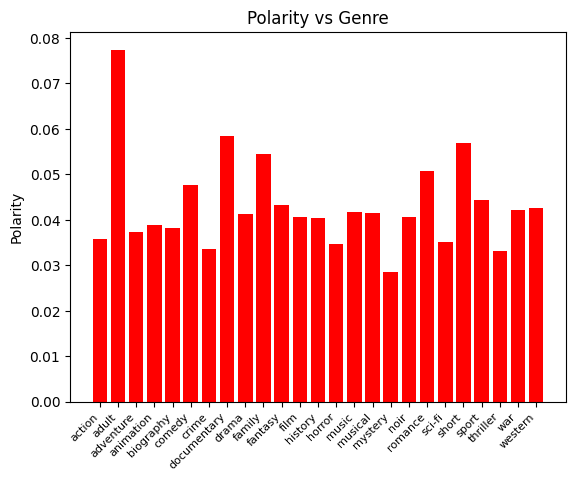

In [ ]:
plt.rcParams['xtick.labelsize'] = 8
plt.xticks(rotation=45, ha='right')
plt.bar(list(dict_polarity_by_genre.keys()), dict_polarity_by_genre.values(), color='r')
plt.ylabel("Polarity")
plt.title("Polarity vs Genre")

NameError: ignored

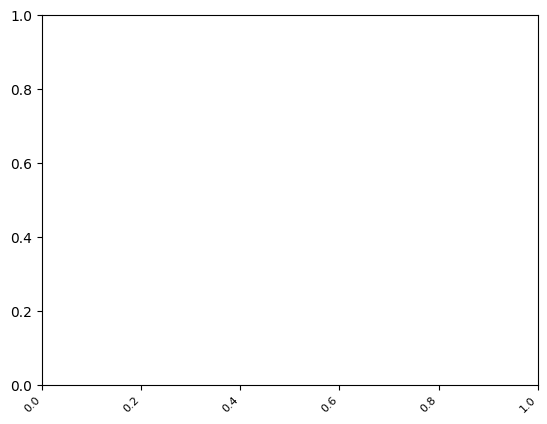

In [ ]:
plt.rcParams['xtick.labelsize'] = 8
plt.xticks(rotation=45, ha='right')
plt.bar(list(dict_subjectivity_by_genre.keys()), dict_subjectivity_by_genre.values(), color='r')
plt.ylabel("Subjectivity")
plt.title("Subjectivity vs Genre")

In [ ]:
df_godfather = df_data[df_data.movie_id == "m203"]

In [ ]:
df_godfather

,line_id,character_id,movie_id,text,gender,rating,genres,tokenized_text,tokenized_text_2,line_polarity,...,musical,mystery,noir,romance,sci-fi,short,sport,thriller,war,western
98523,L593445,u3102,m203,You owe the Don a service. He has no doubt th...,m,9.2,['crime' 'drama' 'thriller'],"[you, owe, the, don, a, servic, he, ha, no, do...",owe servic ha doubt repay,0.000000,...,False,False,False,False,False,False,False,True,False,False
98524,L593443,u3102,m203,This is Tom Hagen; I'm calling for Don Corleon...,m,9.2,['crime' 'drama' 'thriller'],"[thi, is, tom, hagen, i, m, call, for, don, co...",thi tom hagen call corleon hi request,0.000000,...,False,False,False,False,False,False,False,True,False,False
98525,L593425,u3102,m203,Yes.,m,9.2,['crime' 'drama' 'thriller'],[ye],ye,0.000000,...,False,False,False,False,False,False,False,True,False,False
98526,L593423,u3102,m203,Good. He never doubted you.,m,9.2,['crime' 'drama' 'thriller'],"[good, he, never, doubt, you]",good never doubt,0.700000,...,False,False,False,False,False,False,False,True,False,False
98527,L593421,u3102,m203,You owe the Don a service. In one hour not be...,m,9.2,['crime' 'drama' 'thriller'],"[you, owe, the, don, a, servic, in, one, hour,...",owe servic one hour befor perhap later funer p...,0.000000,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99052,L593580,u3106,m203,The chef cooked for you special; the dancers w...,?,9.2,['crime' 'drama' 'thriller'],"[the, chef, cook, for, you, special, the, danc...",chef cook special dancer kick tongu credit goo...,0.528571,...,False,False,False,False,False,False,False,True,False,False
99053,L593578,u3106,m203,Mike good to see you. Got everything you want?,?,9.2,['crime' 'drama' 'thriller'],"[mike, good, to, see, you, got, everyth, you, ...",mike good see got everyth want,0.700000,...,False,False,False,False,False,False,False,True,False,False
99054,L593082,u3115,m203,I think so but I can't get close enough. Ther...,?,9.2,['crime' 'drama' 'thriller'],"[i, think, so, but, i, can, t, get, close, eno...",think get close enough lot blood tri find,0.000000,...,False,False,False,False,False,False,False,True,False,False
99055,L593080,u3115,m203,Right. Don't say my name just listen. Somebo...,?,9.2,['crime' 'drama' 'thriller'],"[right, don, t, say, my, name, just, listen, s...",right say name listen somebodi shot father out...,0.285714,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# write a dataframe to tsv file
df_godfather.to_csv("df_data.tsv", sep="\t")

In [ ]:
df_godfather = pd.read_table('df_data.tsv')

In [ ]:
df_godfather = df_godfather.astype({'line_id':'string'})
print(df_godfather.dtypes);
#df_dup = df_godfather['line_id'].translate({ord('L'): None})
#df_data['line_polarity'] = df_data['tokenized_text_2'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_godfather['line_id'] = df_godfather['line_id'].apply(lambda x: x.replace("L", ''))
df_godfather

Unnamed: 0             int64
line_id               string
character_id          object
movie_id              object
text                  object
gender                object
rating               float64
genres                object
tokenized_text        object
tokenized_text_2      object
line_polarity        float64
line_subjectivity    float64
action                  bool
adult                   bool
adventure               bool
animation               bool
biography               bool
comedy                  bool
crime                   bool
documentary             bool
drama                   bool
family                  bool
fantasy                 bool
film                    bool
history                 bool
horror                  bool
music                   bool
musical                 bool
mystery                 bool
noir                    bool
romance                 bool
sci-fi                  bool
short                   bool
sport                   bool
thriller      

,Unnamed: 0,line_id,character_id,movie_id,text,gender,rating,genres,tokenized_text,tokenized_text_2,...,musical,mystery,noir,romance,sci-fi,short,sport,thriller,war,western
0,98523,593445,u3102,m203,You owe the Don a service. He has no doubt th...,m,9.2,['crime' 'drama' 'thriller'],"['you', 'owe', 'the', 'don', 'a', 'servic', 'h...",owe servic ha doubt repay,...,False,False,False,False,False,False,False,True,False,False
1,98524,593443,u3102,m203,This is Tom Hagen; I'm calling for Don Corleon...,m,9.2,['crime' 'drama' 'thriller'],"['thi', 'is', 'tom', 'hagen', 'i', 'm', 'call'...",thi tom hagen call corleon hi request,...,False,False,False,False,False,False,False,True,False,False
2,98525,593425,u3102,m203,Yes.,m,9.2,['crime' 'drama' 'thriller'],['ye'],ye,...,False,False,False,False,False,False,False,True,False,False
3,98526,593423,u3102,m203,Good. He never doubted you.,m,9.2,['crime' 'drama' 'thriller'],"['good', 'he', 'never', 'doubt', 'you']",good never doubt,...,False,False,False,False,False,False,False,True,False,False
4,98527,593421,u3102,m203,You owe the Don a service. In one hour not be...,m,9.2,['crime' 'drama' 'thriller'],"['you', 'owe', 'the', 'don', 'a', 'servic', 'i...",owe servic one hour befor perhap later funer p...,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,99052,593580,u3106,m203,The chef cooked for you special; the dancers w...,?,9.2,['crime' 'drama' 'thriller'],"['the', 'chef', 'cook', 'for', 'you', 'special...",chef cook special dancer kick tongu credit goo...,...,False,False,False,False,False,False,False,True,False,False
530,99053,593578,u3106,m203,Mike good to see you. Got everything you want?,?,9.2,['crime' 'drama' 'thriller'],"['mike', 'good', 'to', 'see', 'you', 'got', 'e...",mike good see got everyth want,...,False,False,False,False,False,False,False,True,False,False
531,99054,593082,u3115,m203,I think so but I can't get close enough. Ther...,?,9.2,['crime' 'drama' 'thriller'],"['i', 'think', 'so', 'but', 'i', 'can', 't', '...",think get close enough lot blood tri find,...,False,False,False,False,False,False,False,True,False,False
532,99055,593080,u3115,m203,Right. Don't say my name just listen. Somebo...,?,9.2,['crime' 'drama' 'thriller'],"['right', 'don', 't', 'say', 'my', 'name', 'ju...",right say name listen somebodi shot father out...,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_godfather.sort_values(by = 'line_id',ascending = True)

,Unnamed: 0,line_id,character_id,movie_id,text,gender,rating,genres,tokenized_text,tokenized_text_2,...,musical,mystery,noir,romance,sci-fi,short,sport,thriller,war,western
86,98609,592849,u3098,m203,Bonasera we know each other for years but this...,m,9.2,['crime' 'drama' 'thriller'],"['bonasera', 'we', 'know', 'each', 'other', 'f...",bonasera know year thi first time come help re...,...,False,False,False,False,False,False,False,True,False,False
76,98599,592850,u3094,m203,What do you want of me? I'll give you anythin...,?,9.2,['crime' 'drama' 'thriller'],"['what', 'do', 'you', 'want', 'of', 'me', 'i',...",want give anyth want ask,...,False,False,False,False,False,False,False,True,False,False
85,98608,592851,u3098,m203,And what is that Bonasera?,m,9.2,['crime' 'drama' 'thriller'],"['and', 'what', 'is', 'that', 'bonasera']",bonasera,...,False,False,False,False,False,False,False,True,False,False
84,98607,592852,u3098,m203,No. You ask for too much.,m,9.2,['crime' 'drama' 'thriller'],"['no', 'you', 'ask', 'for', 'too', 'much']",ask much,...,False,False,False,False,False,False,False,True,False,False
75,98598,592853,u3094,m203,I ask for Justice.,?,9.2,['crime' 'drama' 'thriller'],"['i', 'ask', 'for', 'justic']",ask justic,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,98980,593743,u3104,m203,Michael it's not true. Please tell me.,f,9.2,['crime' 'drama' 'thriller'],"['michael', 'it', 's', 'not', 'true', 'pleas',...",michael true pleas tell,...,False,False,False,False,False,False,False,True,False,False
199,98722,593744,u3105,m203,Don't ask me.,m,9.2,['crime' 'drama' 'thriller'],"['don', 't', 'ask', 'me']",ask,...,False,False,False,False,False,False,False,True,False,False
456,98979,593745,u3104,m203,Tell me!,f,9.2,['crime' 'drama' 'thriller'],"['tell', 'me']",tell,...,False,False,False,False,False,False,False,True,False,False
198,98721,593746,u3105,m203,All right this one time I'll let you ask about...,m,9.2,['crime' 'drama' 'thriller'],"['all', 'right', 'thi', 'one', 'time', 'i', 'l...",right thi one time let ask affair one last time,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_godfather_clean = df_godfather[df_godfather.line_subjectivity != 0]

<Axes: xlabel='line_id'>

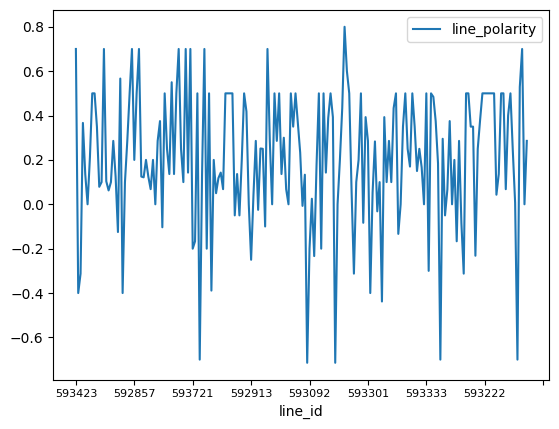

In [ ]:
df_godfather_clean.plot.line(x='line_id', y='line_polarity')

<Axes: xlabel='line_id'>

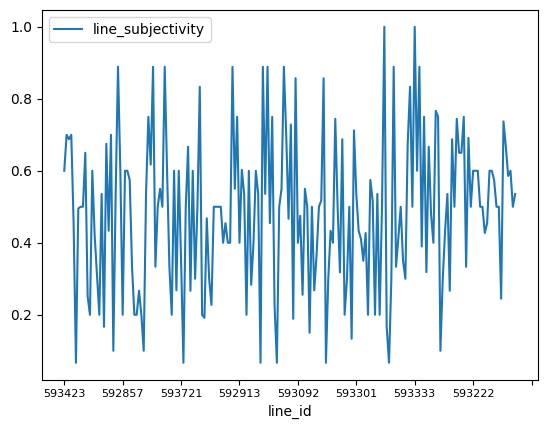

In [ ]:
df_godfather_clean.plot.line(x='line_id', y='line_subjectivity')

In [ ]:
df_michael = df_godfather_clean[df_godfather_clean.character_id == "u3105"]

In [ ]:
df_michael

,Unnamed: 0,line_id,character_id,movie_id,text,gender,rating,genres,tokenized_text,tokenized_text_2,...,musical,mystery,noir,romance,sci-fi,short,sport,thriller,war,western
137,98660,593724,u3105,m203,Good good. Leave now; there's a car waiting t...,m,9.2,['crime' 'drama' 'thriller'],"['good', 'good', 'leav', 'now', 'there', 's', ...",good good leav car wait take airport,...,False,False,False,False,False,False,False,True,False,False
139,98662,593721,u3105,m203,Barzini is dead. So is Philip Tattaglia so ar...,m,9.2,['crime' 'drama' 'thriller'],"['barzini', 'is', 'dead', 'so', 'is', 'philip'...",barzini dead philip tattaglia strachi cuneo mo...,...,False,False,False,False,False,False,False,True,False,False
144,98667,593628,u3105,m203,Maybe less...,m,9.2,['crime' 'drama' 'thriller'],"['mayb', 'less']",mayb less,...,False,False,False,False,False,False,False,True,False,False
145,98668,593626,u3105,m203,He's going to be our lawyer in Vegas. Nobody ...,m,9.2,['crime' 'drama' 'thriller'],"['he', 's', 'go', 'to', 'be', 'our', 'lawyer',...",go lawyer vega nobodi goe ani busi thi minut r...,...,False,False,False,False,False,False,False,True,False,False
147,98670,593311,u3105,m203,How bad will it be?,m,9.2,['crime' 'drama' 'thriller'],"['how', 'bad', 'will', 'it', 'be']",bad,...,False,False,False,False,False,False,False,True,False,False
168,98691,593470,u3105,m203,I was told that my Grandfather was murdered on...,m,9.2,['crime' 'drama' 'thriller'],"['i', 'wa', 'told', 'that', 'my', 'grandfath',...",wa told grandfath wa murder main street hi mur...,...,False,False,False,False,False,False,False,True,False,False
186,98709,593561,u3105,m203,You look good too.,m,9.2,['crime' 'drama' 'thriller'],"['you', 'look', 'good', 'too']",look good,...,False,False,False,False,False,False,False,True,False,False
187,98710,593558,u3105,m203,Why didn't Moe Green meet us at the airport?,m,9.2,['crime' 'drama' 'thriller'],"['whi', 'didn', 't', 'moe', 'green', 'meet', '...",whi moe green meet us airport,...,False,False,False,False,False,False,False,True,False,False
188,98711,593684,u3105,m203,A week from tonight. In Brooklyn on Tessio's ...,m,9.2,['crime' 'drama' 'thriller'],"['a', 'week', 'from', 'tonight', 'in', 'brookl...",week tonight brooklyn tessio ground safe,...,False,False,False,False,False,False,False,True,False,False
192,98715,593648,u3105,m203,You're not a wartime Consigliere. Things may g...,m,9.2,['crime' 'drama' 'thriller'],"['you', 're', 'not', 'a', 'wartim', 'consiglie...",wartim consiglier thing may get tough move tri,...,False,False,False,False,False,False,False,True,False,False


<Axes: xlabel='line_id'>

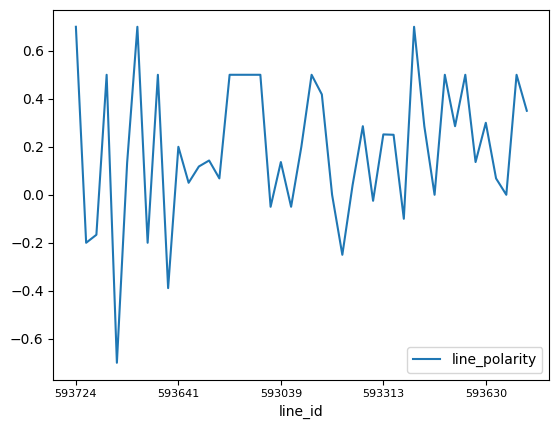

In [ ]:
df_michael.plot.line(x='line_id', y='line_polarity')

<Axes: xlabel='line_id'>

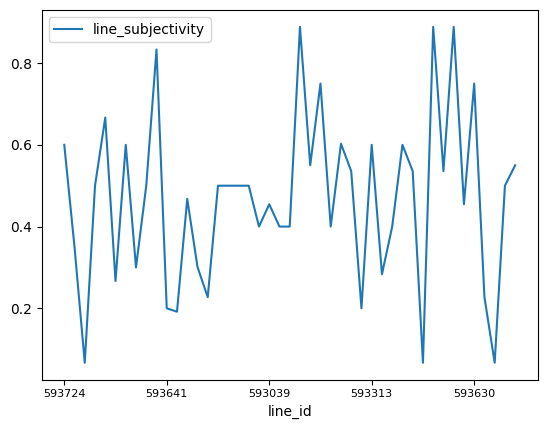

In [ ]:
df_michael.plot.line(x='line_id', y='line_subjectivity')

In [ ]:
# write a dataframe to tsv file
df_godfather.to_csv("df_godfather.csv", sep=",")
df_michael.to_csv("df_michael.csv", sep=",")
df_data.to_csv("df_data.csv", sep=",")